# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Isabel María Moreno Cuadrado</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

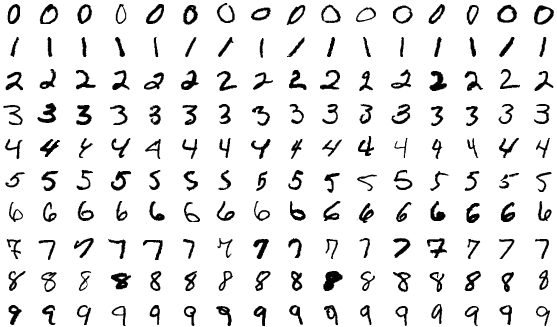



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

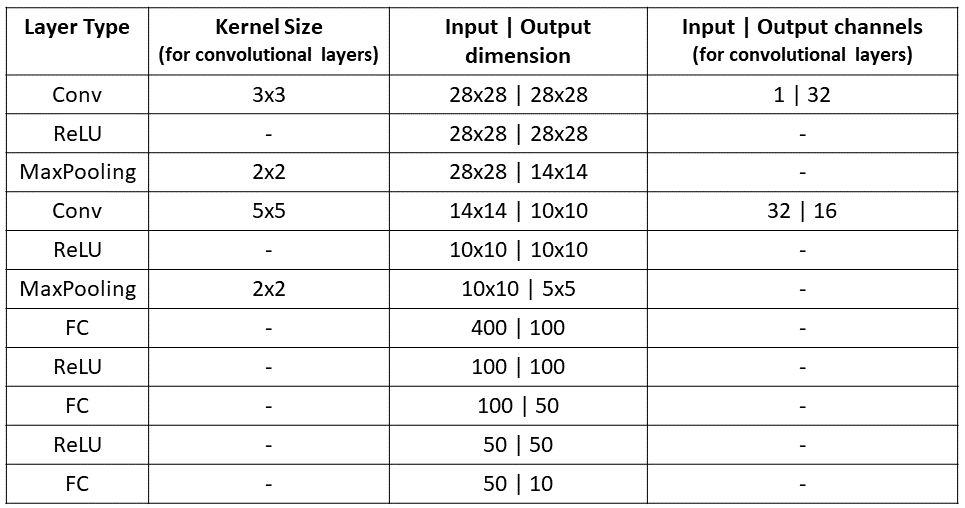

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

# MNIST

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


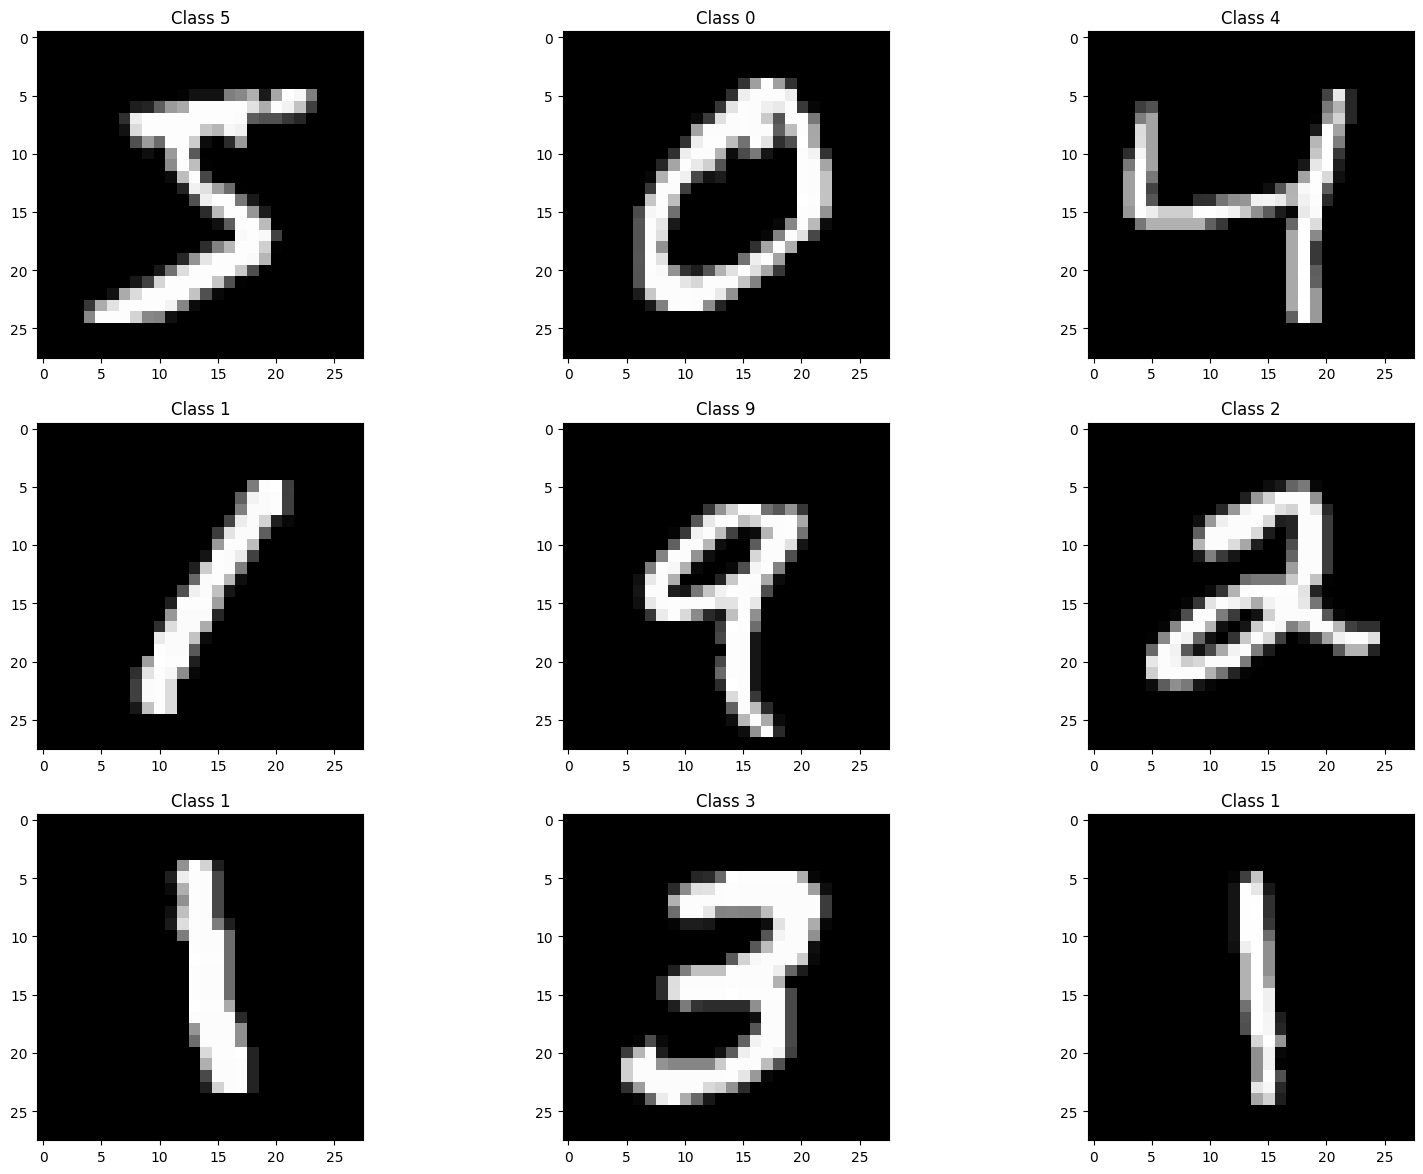

In [30]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

En este ejercicio se nos pide trabajar con el dataset MNIST. El dataset MNIST es uno de los conjuntos de datos más utilizados por los usuarios que comienzan a realizar pruebas con herramientas de AA debido a la facilidad de comprensión de los problemas que ofrece su uso. MNIST es un subconjunto de dígitos escritos a mano basado en otro conjunto más grande, llamado NIST. Consta de 70,000 imágenes, 60,000 para entrenamiento y 10,000 para test. Las imágenes de la base de datos NIST están en blanco y negro y tienen un tamaño de 20x20 píxeles, pero el subconjunto de imágenes de MNIST se normalizó y se suavizó, lo que provocó que pasasen a ser de 28x28 píxeles y se introdujesen niveles de escala de grises. Las imágenes se dividen en 10 categorías, correspondientes a los números del 0 al 9, escritos a mano alzada.
El uso de MNIST ha sido fundamental en la investigación y desarrollo de técnicas avanzadas de DL, como las CNN. A lo largo de los años, ha servido como un estándar de referencia para evaluar y comparar el rendimiento de nuevos métodos y arquitecturas en tareas de reconocimiento de patrones y clasificación.

In [31]:
import matplotlib.pyplot as plt

def mostrarEvolucion(hist):
    # Configurar la figura y los subplots
    plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura para acomodar tres gráficos

    # Gráfico de la pérdida
    plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, 1er subplot
    plt.plot(hist.history['loss'], label='Training loss')
    plt.plot(hist.history['val_loss'], label='Validation loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.xticks(range(0, len(hist.history['loss'])))

    # Gráfico de la precisión
    plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, 2do subplot
    plt.plot(hist.history['accuracy'], label='Training accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.xticks(range(0, len(hist.history['accuracy'])))

    # Gráfico del F1-Score
    plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, 3er subplot
    if 'f1_score_metric' in hist.history:
        plt.plot(hist.history['f1_score_metric'], label='Training F1 Score')
        plt.plot(hist.history['val_f1_score_metric'], label='Validation F1 Score')
        plt.title('Model F1-Score')
        plt.ylabel('F1 Score')
        plt.xlabel('Epoch')
        plt.legend(loc='lower right')
        plt.xticks(range(0, len(hist.history['f1_score_metric'])))
    else:
        print("F1-Score not found in history. Ensure it's correctly computed and added.")

    plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
    plt.show()


In [32]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion2(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [33]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
from sklearn.metrics import f1_score

def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


def calcularF1Score(labels, preds):
    # Convertir las etiquetas y predicciones a las clases con mayor probabilidad
    labels = np.argmax(labels, axis=1)
    preds = np.argmax(preds, axis=1)

    # Calcular el F1-Score
    f1 = f1_score(labels, preds, average='weighted')  # 'weighted' toma en cuenta el desbalance de clases
    return f1


La técnica que se empleará como procedimiento de validación experimental es una variante del hold-out. El hold-out consiste en dividir los datos en un conjunto de prueba y otro de entrenamiento. Sin embargo, la diferencia principal con esta "variante" radica en que dentro del conjunto de entrenamiento se reserva un subconjunto adicional para la validación. Este conjunto de validación se emplea para evaluar el rendimiento del modelo sin afectar la independencia del conjunto de prueba. Este enfoque es el más comúnmente utilizado DL por el número tan elevado de datos con el que se suele trabajar, que implica que otras técnicas como el cross-valdiation o leave-one-out sean inviables.
Se reservará un 20\% de los datos para validación. 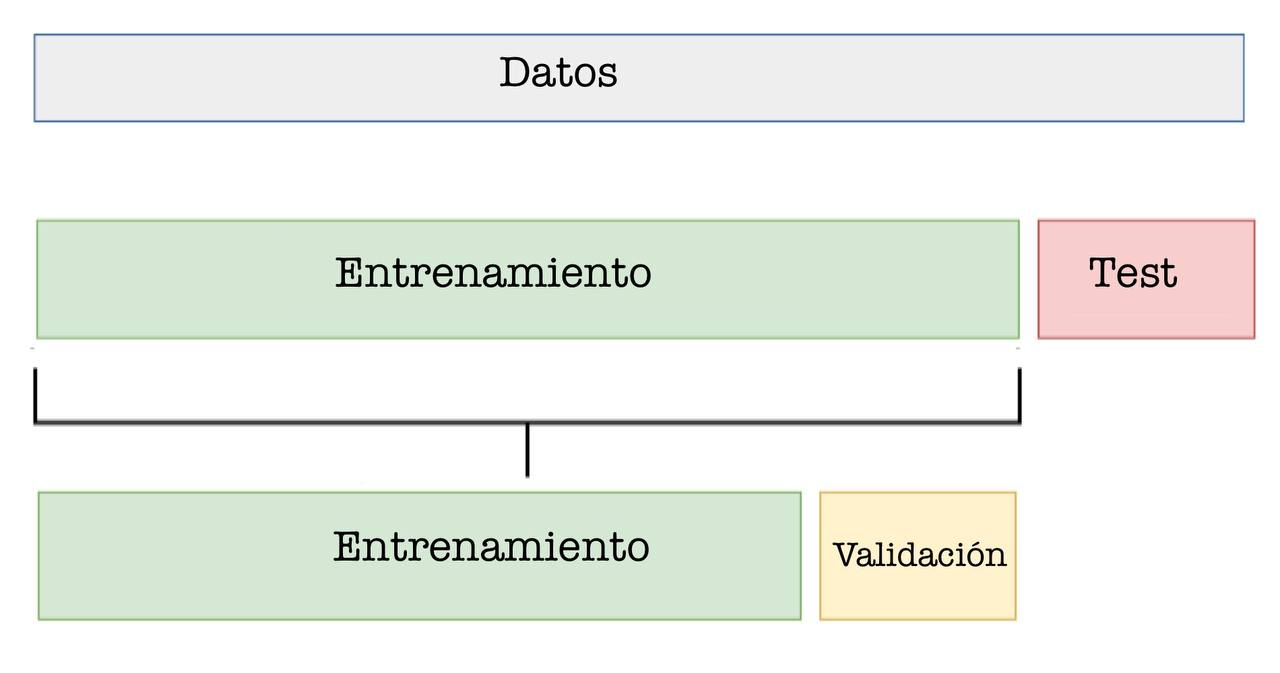  

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Obtener los índices de las divisiones de test y val
train_index, val_index = next(sss.split(x_train, y_train))

test_data = x_train
test_pred = y_train

# Dividir el conjunto de datos en entrenamiento y test según los índices generados
x_train, x_val = test_data[train_index], test_data[val_index]
y_train, y_val = test_pred[train_index], test_pred[val_index]

Comprobamos las dimensiones de las particiones creadas

In [ ]:
len(x_test)

10000

In [ ]:
len(x_val)

12000

In [ ]:
len(x_train)

48000

A continuación se define el modelo siguiendo el esquema planteado en el enunciado.


Ahora procedo a desarrollar el modelo BaseNet según las especificaciones detalladas en la tabla del enunciado, he querido hacer un breve repaso sobre cada una de las capas que se usan para también indicar de donde proceden los distintos parámetros.

1. **Convolución inicial:**
   - Convolución con un kernel de 3x3, 1 canal de entrada y 32 canales de salida.
   - Dimensiones de entrada: 28x28, correspondientes al tamaño de las imágenes en el conjunto de datos.
   -  Dimensiones de salida: 28x28
   - Número de parámetros: (3$\times$3$\times$1+1)$\times$32=320.

2. **ReLU:**
   - La función de activación ReLU, es una función de activación. Sigue la fórmula ReLU(x)=max(0,x), es decir, si el valor de entrada x es positivo, la función ReLU devuelve el mismo valor. Si x es negativo, la función devuelve cero.Se utiliza principalmente para evitar que la red neuronal se comporte como una función lineal y permite que esta aprende representaciones más complejas a partir de los datos. Además usar ReLu y sus variantes permite un entrenamiento más rápido en general. Si bien es cierto que presenta desventajas como el desvanecimiento del gradiente debido a las "dead ReLU units".
   -  No tiene parámetros.
3. **MaxPool 2x2:**
   - Operación de reducción de dimensionalidad y generación de invarianza ante pequeñas traslaciones en la entrada.
   - La entrada de dimensiones 28x28 se reduce a 14x14.
   - Se selecciona el píxel de mayor valor en cada cuadrado 2x2 (cada 4 píxeles).
   -  No tiene parámetros.


4. **Convolución intermedia:**
   - Convolución con un kernel de 5x5, 32 canales de entrada y 16 canales de salida.
   - Dimensiones de entrada: 14x14, resultantes de la operación de MaxPooling.
   - Dimensiones de salida: 10x10.
   - Número de parámetros: (5$\times$5$\times$32+1)$\times$16=12,816.

5. **ReLU:**
   - Función de activación ReLU, aplicada de la misma manera que se describió anteriormente.
   -  No tiene parámetros.

6. **MaxPool 2x2:**
   - Operación de reducción de dimensionalidad y generación de invarianza ante pequeñas traslaciones en la entrada.
   - La entrada de dimensiones 10x10 se reduce a 5x5.
   - Se selecciona el píxel de mayor valor en cada cuadrado 2x2 (cada 4 píxeles).
   -  No tiene parámetros.

7. **Flatten:**
   - Transforma el volumen resultante en un vector para su procesamiento por una capa completamente conectada (Fully-Connected, FC).
  
8. **Linear (FC):**
   - Capa "full conected" que conecta los 400 nodos de entrada (obtenidos al aplanar el resultado de la última convolución: 5x5x16=400) con 100 nodos de salida.
   -Número de parámetros: (400+1)$\times$100=40,100

9. **ReLU:**
   - Aplicación de la función de activación ReLU como se ha descrito previamente.
   - No tiene parámetros.

10. **Linear (FC):**
   - Conecta los 100 nodos de entrada con 50 nodos de salida
   - Número de parámetros: (100+1)$\times$50=5,050.


11. **ReLU:**
   - Aplicación de la función de activación ReLU como se ha descrito previamente.
   -  No tiene parámetros.

12. **Linear (FC):**
   - Conecta los 50 nodos de entrada con 10 nodos de salida
   - El tamaño de salida es 10, correspondiente al número de clases en el problema abordado.
   - Número de parámetros: (50+1)$\times$10=5107

   El número total de parámetos sería por tanto:
   \begin{equation}
   320+12816+40100+5050+510=58796
   \end{equation}

 Se utilizará la técnica de early-stopping, utilizada en el entrenamiento de modelos de AA para evitar el sobreajuste. Funciona deteniendo el proceso de entrenamiento antes de que este haya concluido si no se observa una mejora significativa en el rendimiento del modelo sobre un conjunto de datos de validación. Este rendimiento se evalúa utilizando determinadas métricas

In [35]:
from keras.layers import Input
from keras.callbacks import EarlyStopping
from keras.optimizers import AdamW, Adadelta
from keras import backend as K

# Creamos el modelo
def create_model():
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Input: 28x28 x 1 || Output: 28x28 x 32
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')) # Añadimos padding = same para mantener el tamaño

    # Input: 28x28 x 32 || Output: 14x14 x 32
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Input: 14x14 x 32 || Output: 10x10 x 16
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu')) # Sin padding para reducir el tamaño

    # Input: 10x10 x 16 || Output: 5x5 x 16
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Input: 5x5 x 16 || Output: 5x5 x 16 = 400
    model.add(Flatten())

    # Input: 400 || Output: 100
    model.add(Dense(100, activation='relu'))

    # Input: 100 || Output: 50
    model.add(Dense(50, activation='relu'))

    # Input: 50 || Output: num_classes
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Callback para early stopping que incluiremos al hacer fit
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Early stopping es una técnica de regularización para reducir el overfitting que consiste en parar el entrenamiento cuando la métrica que indiquemos (en este caso, la pérdida en validación) no mejora durante un número de indicaciones.

In [36]:
model_adamw = create_model()

Mostramos el resumen del modelo, comprobando así que la arquitectura es la correcta.

In [37]:
model_adamw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

Por defecto, el tamaño de batch es 32 ("batch size should be no more than 32", Yann LeCun). Un tamaño grande de batch hace que converja más rápidamente, sin embargo, el modelo generalizará peor. Además, escogeremos un tamaño potencia de 2, ya que ayuda a la eficiencia hardware. ([Diferencias en Batchsize y el efecto en train, ](https://forums.fast.ai/t/difference-in-batchsize-and-effect-on-training/52341) [Paper: On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima](https://arxiv.org/abs/1609.04836) ). Así que en este primer modelo elegiremos un tamaño de 16, ya que no es lo suficientemente grande como para que no generalice bien, pero no es pequeño para que el tiempo aumente considerablemente.

Por otra parte el proceso de aprendizaje en las CNN se lleva a cabo de forma similar a las redes neuronales clásicas, utilizando la técnica de Backpropagation. No obstante, el optimizador de Gradiente Descendente, aplica una tasa de aprendizaje  única para todos los pesos de la red y esta tasa permanece constante durante todo el entrenamiento. Por esta razón, se prefiere generalmente el uso del optimizador Adam , que no solo permite asignar una tasa de aprendizaje distinta para cada parámetro, sino que también ajusta estas tasas de manera adaptativa.


Para evaluar el rendimiento del modelo se utilizan una serie de métricas sobre el conjunto de validación. En este caso el accuracy es una métrica bastante representativa ya que este conjunto de datos (ampliamente conocido) está en general bastante bien balanceado. Sin embargo siempre es bueno tener otras métricas para poder comparar los resultados.


Para medir el rendimiento de un modelo de clasificación, es fundamental presentar ciertos conceptos básicos que describen los diferentes tipos de resultados de predicción.


* Verdaderos Positivos (TP). Las instancias correctamente clasificadas como positivas.
* Falsos Positivos (FP). Las instancias incorrectamente clasificadas como positivas.
* Verdaderos Negativos (TN). Las instancias correctamente clasificadas como negativas.
* Falsos Negativos (FN). Las instancias incorrectamente clasificadas como negativas.


En base a estos se pueden definir diversas métricas evaluación para medir el rendimiento del modelo. Cada métrica proporciona información específica sobre diferentes aspectos. A continuación se describen algunas de las métricas más comunes para un problema de clasificación.

   
* **Accuracy.**
Es una métrica que mide la proporción de predicciones correctas realizadas por un modelo sobre el total de predicciones realizadas. Matemáticamente, se calcula como la suma de predicciones correctas dividida por el número total de predicciones. Sin embargo, esta métrica puede ser engañosa si hay un desequilibrio entre las clases objetivo, ya que puede dar una impresión falsa de la calidad del modelo.

 \begin{equation}
   320+12816+40100+5050+510=58796
 \end{equation}

\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}


* **Precisión.**
La precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas.

\begin{equation}
\text{Precisión} = \frac{TP}{TP + FP}
\end{equation}

* **Sensibilidad.**
La sensibilidad mide la proporción de verdaderos positivos entre todas las muestras que son realmente positivas.   
\begin{equation}
\text{Exhaustividad} = \frac{TP}{TP + FN}
\end{equation}

* **F1Score**. El F1-Score es una métrica que combina precisión y recuperación en una sola medida. Es especialmente útil cuando hay un desequilibrio entre las clases objetivo, ya que tiene en cuenta tanto los falsos positivos como los falsos negativos. El F1-Score se calcula como la media armónica de precisión y recuperación.
\begin{equation}
	F1 = 2 \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}
\end{equation}

La métrica F1score resume por tanto la Sensibilidad y la precisión, así que implementaremos a mano esta ya que no se encuentra incorporada directamente.

In [38]:
def f1_score_metric(y_true, y_pred):
    # Convertir las predicciones y etiquetas verdaderas a clases predichas
    y_true = K.argmax(y_true, axis=1)
    y_pred = K.argmax(y_pred, axis=1)

    # Calcular TP, FP, FN
    TP = K.sum(K.cast(y_true == y_pred, 'float32') * K.cast(y_true == 1, 'float32'))
    FP = K.sum(K.cast(y_pred == 1, 'float32')) - TP
    FN = K.sum(K.cast(y_true == 1, 'float32')) - TP

    # Calcular precisión y recall
    precision = TP / (TP + FP + K.epsilon())
    recall = TP / (TP + FN + K.epsilon())

    # Calcular F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1


In [39]:
import numpy as np

def f1_score_np(y_true, y_pred):
    # Convertir las predicciones y etiquetas verdaderas a clases predichas
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Calcular TP, FP, FN
    TP = np.sum((y_true == y_pred) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true != 1))
    FN = np.sum((y_true == 1) & (y_pred != 1))

    # Calcular precisión y recall
    precision = TP / (TP + FP + 1e-8)  # Agregar un pequeño epsilon para evitar división por cero
    recall = TP / (TP + FN + 1e-8)

    # Calcular F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    return f1


learning_rate: A float, a keras.optimizers.schedules.LearningRateSchedule instance, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.
https://medium.com/@deepeshdeepakdd2/lenet-5-implementation-on-mnist-in-pytorch-c6f2ee306e37
https://www.kaggle.com/code/niranjanjagannath/lenet-5-architecture-for-mnist-using-tensorflow

In [40]:
import time

#lr=5e-4
# Entrenamiento y evaluación con AdamW
model_adamw.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=AdamW(),
    metrics=['accuracy', f1_score_metric]
)
start_time = time.time()

hist_adamw = model_adamw.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1,
                             validation_data=(x_val,y_val), callbacks=[early_stopping])
training_time = time.time() - start_time
print(training_time)

Epoch 1/20
3000/3000 [==============================] - 29s 8ms/step - loss: 0.1651 - accuracy: 0.9483 - f1_score_metric: 0.8270 - val_loss: 0.0634 - val_accuracy: 0.9806 - val_f1_score_metric: 0.8460
Epoch 2/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0551 - accuracy: 0.9826 - f1_score_metric: 0.8365 - val_loss: 0.0580 - val_accuracy: 0.9823 - val_f1_score_metric: 0.8439
Epoch 3/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0387 - accuracy: 0.9882 - f1_score_metric: 0.8382 - val_loss: 0.0411 - val_accuracy: 0.9887 - val_f1_score_metric: 0.8476
Epoch 4/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0300 - accuracy: 0.9908 - f1_score_metric: 0.8471 - val_loss: 0.0409 - val_accuracy: 0.9881 - val_f1_score_metric: 0.8454
Epoch 5/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0239 - accuracy: 0.9921 - f1_score_metric: 0.8450 - val_loss: 0.0482 - val_accuracy: 0.9868 - val_f1_score_metric: 0.

Mostramos el progreso durante en entrenamiento


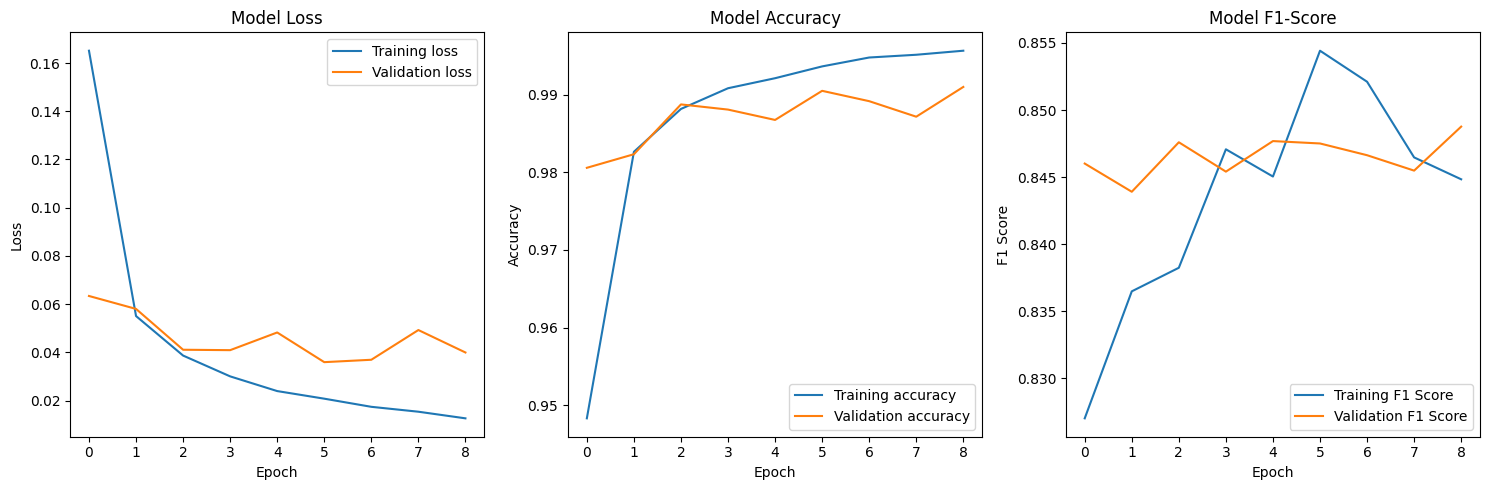

In [41]:
mostrarEvolucion(hist_adamw)

La observación de las curvas de entrenamiento muestra que la pérdida alcanza un nivel significativamente bajo ya para la época 3, lo que sugiere una rápida convergencia del modelo hacia una solución efectiva. Además, las métricas de rendimiento complementan esta observación, indicando resultados positivos desde este punto en adelante. Este comportamiento puede interpretarse como un indicio de que el modelo no solo aprende eficientemente, sino que también es capaz de generalizar bien desde las primeras etapas del entrenamiento.
Sin embargo lo que hicimos fue ejecutar 10 epocas sin parada temprana a ver que ocurre, ya que al ejecutar la parada temprana siento que no puedo ver mucho de lo que pasa después porque el  modelo lo ha calculado de manera interna y ha visto que el mejor punto era ese. 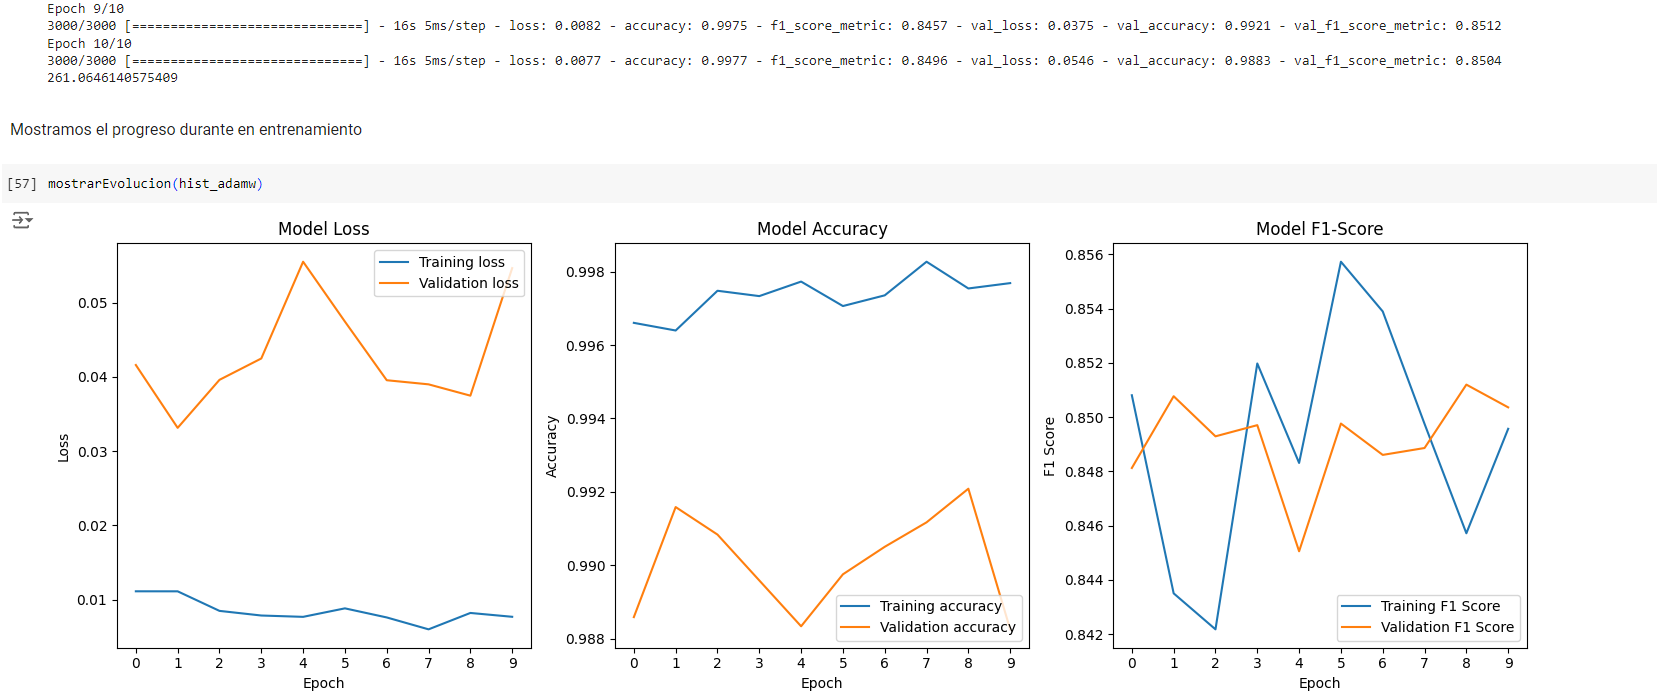

In [42]:
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_misclassified_images(x_data, y_true, y_pred, title='Misclassified Images'):
    misclassified_indexes = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 5))
    for i, mis_idx in enumerate(misclassified_indexes[:10]):  # Mostrar solo los primeros 10
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.squeeze(x_data[mis_idx]), cmap='gray')
        plt.title(f'Pred: {y_pred[mis_idx]}, True: {y_true[mis_idx]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

1500/1500 [==============================] - 3s 2ms/step


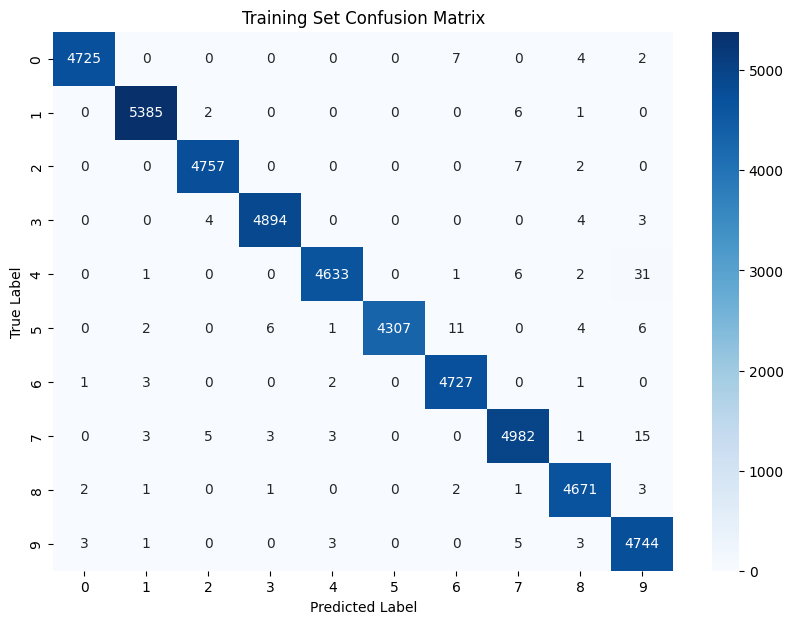

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Para visualizar la matriz de confusión

# Predicciones
y_pred_train = model_adamw.predict(x_train)

# Convertir probabilidades a clases predichas
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_true_train = np.argmax(y_train, axis=1)

# Matrices de Confusión
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train_classes)

# Función para visualizar la matriz de confusión

# Mostrar matrices de confusión
plot_confusion_matrix(conf_matrix_train, title='Training Set Confusion Matrix')


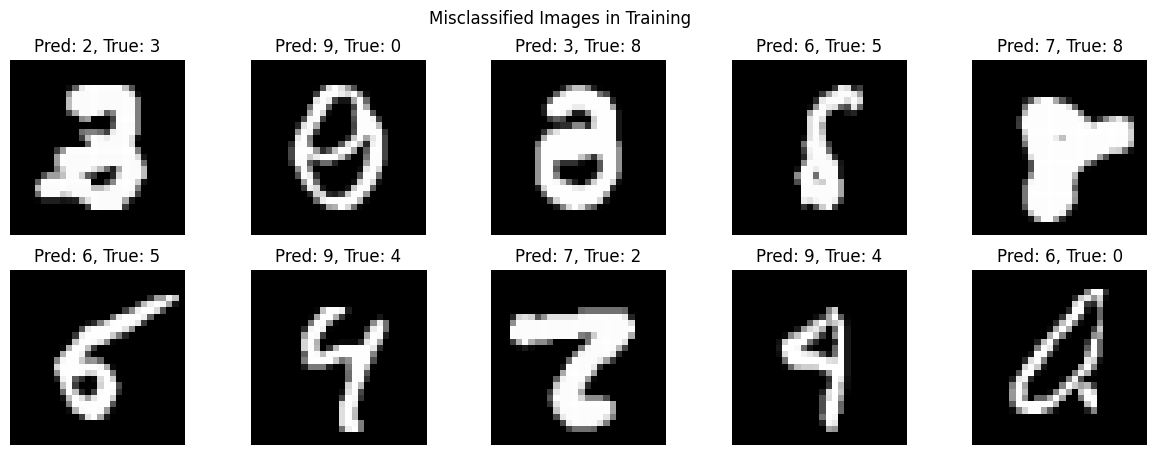

In [44]:

# Mostrar ejemplos mal clasificados en entrenamiento y prueba
plot_misclassified_images(x_train, y_true_train, y_pred_train_classes, 'Misclassified Images in Training')

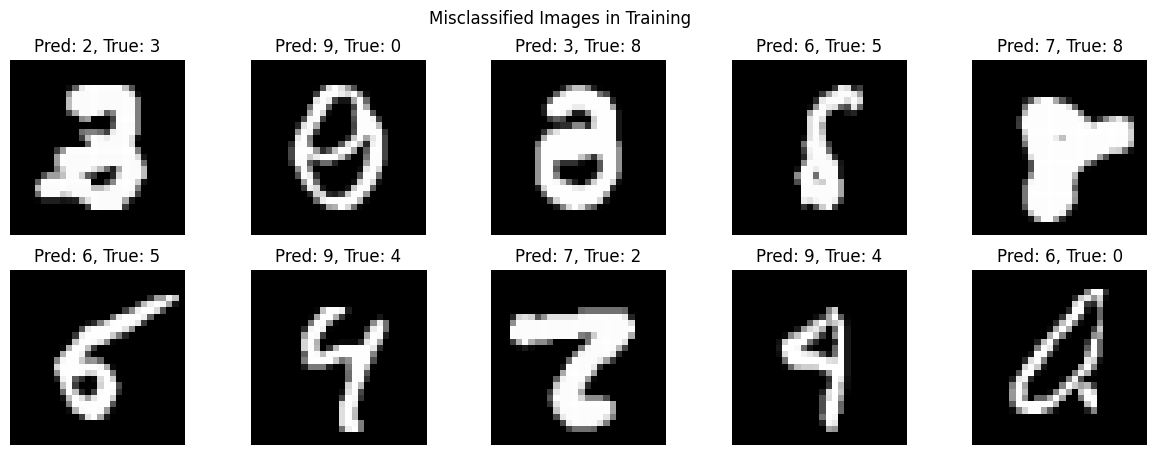

In [45]:

# Mostrar ejemplos mal clasificados en entrenamiento y prueba
plot_misclassified_images(x_train, y_true_train, y_pred_train_classes, 'Misclassified Images in Training')

**IMPORTANTE**

Voy a aplicar el modelo para ver como se comporta en Test, simplemente porque creo que es interesante comprobar cómo es el rendimiento en un conjunto que no ha visto y comparar con los resultados obtenidos durante el entrenamiento. Sin embargo este ejercicio también nos pide utilizar el optimizador Adadelta. En ningun caso esta comparación se basará en el test, para comparar entre ambos **SOLAMENTE** se observará su comportamiento durante el entrenamiento y el resultado obtenido en el conjunto de validación. Esta metodología asegura que la evaluación de los optimizadores se haga de manera justa y consistente, sin la influencia de los datos de prueba, que deben permanecer como una medida imparcial del rendimiento final del modelo.

In [46]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluar el modelo en el conjunto de test
score_adamw = model_adamw.evaluate(x_test, y_test, verbose=0)
print('AdamW pérdida en Test:', score_adamw[0])
print('AdamW Test accuracy:', score_adamw[1])
print('AdamW Test F1-Score:', score_adamw[2])

# Calcular el F1-Score en el test
y_pred_adamw = model_adamw.predict(x_test)
# Otra forma de calcular el accuracy en test
accuracy_adamw = calcularAccuracy(y_test, y_pred_adamw)
print('AdamW Accuracy:', accuracy_adamw)


AdamW pérdida en Test: 0.030891824513673782
AdamW Test accuracy: 0.9902999997138977
AdamW Test F1-Score: 0.9737018346786499
313/313 [==============================] - 1s 3ms/step
AdamW Accuracy: 0.9903


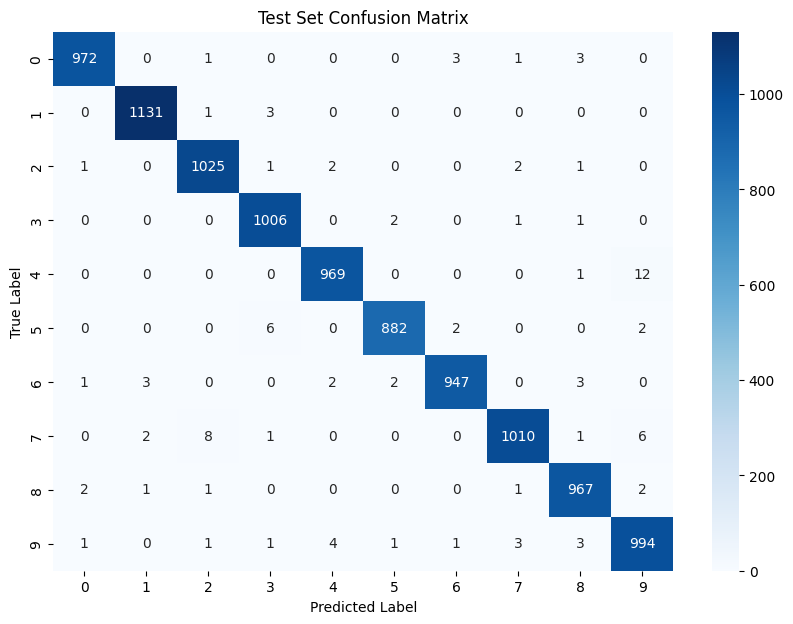

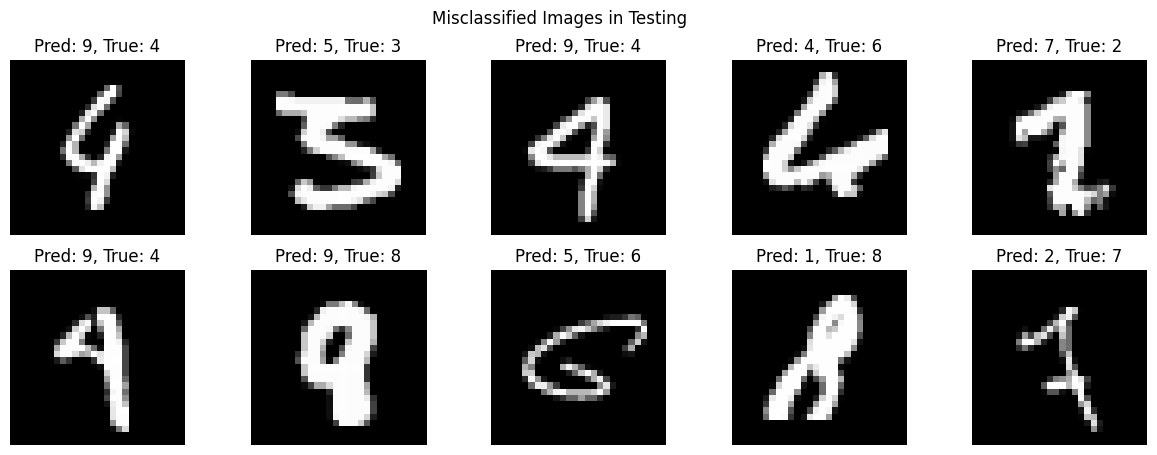

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Para visualizar la matriz de confusión

y_pred_test_classes = np.argmax(y_pred_adamw, axis=1)
y_true_test = np.argmax(y_test, axis=1)


conf_matrix_test = confusion_matrix(y_true_test, y_pred_test_classes)

# Mostrar matrices de confusión
plot_confusion_matrix(conf_matrix_test, title='Test Set Confusion Matrix')

plot_misclassified_images(x_test, y_true_test, y_pred_test_classes, 'Misclassified Images in Testing')


Replicamos lo anterior con el optimizador Adadelta

In [ ]:
model_adadelta = create_model()

In [ ]:
model_adadelta.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

Entrenamos el modelo y mostramos los resultados

In [ ]:
model_adadelta.compile(loss=keras.losses.categorical_crossentropy,
                       optimizer=Adadelta(),
                       metrics=['accuracy', f1_score_metric])

hist_adadelta = model_adadelta.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1,
                                   validation_data=(x_val,y_val), callbacks=[early_stopping])

score_adadelta = model_adadelta.evaluate(x_test, y_test, verbose=0)
print('Adadelta Test loss:', score_adadelta[0])
print('Adadelta Test accuracy:', score_adadelta[1])

y_pred_adadelta = model_adadelta.predict(x_test)
accuracy_adadelta = calcularAccuracy(y_test, y_pred_adadelta)
print('Adadelta Accuracy:', accuracy_adadelta)

Epoch 1/20
3750/3750 [==============================] - 22s 6ms/step - loss: 3.0116 - accuracy: 0.1064 - f1_score_metric: 0.2705 - val_loss: 1.0580 - val_accuracy: 0.6415 - val_f1_score_metric: 0.5944
Epoch 2/20
3750/3750 [==============================] - 19s 5ms/step - loss: 1.9232 - accuracy: 0.2837 - f1_score_metric: 0.5431 - val_loss: 1.1251 - val_accuracy: 0.6103 - val_f1_score_metric: 0.5949
Epoch 3/20
3750/3750 [==============================] - 19s 5ms/step - loss: 1.5761 - accuracy: 0.4176 - f1_score_metric: 0.5318 - val_loss: 1.1972 - val_accuracy: 0.5865 - val_f1_score_metric: 0.5897
Epoch 4/20
3750/3750 [==============================] - 18s 5ms/step - loss: 1.3681 - accuracy: 0.5088 - f1_score_metric: 0.5367 - val_loss: 1.2771 - val_accuracy: 0.5667 - val_f1_score_metric: 0.5912
Adadelta Test loss: 2.2093489170074463
Adadelta Test accuracy: 0.20419999957084656
313/313 [==============================] - 1s 3ms/step
Adadelta Accuracy: 0.2042


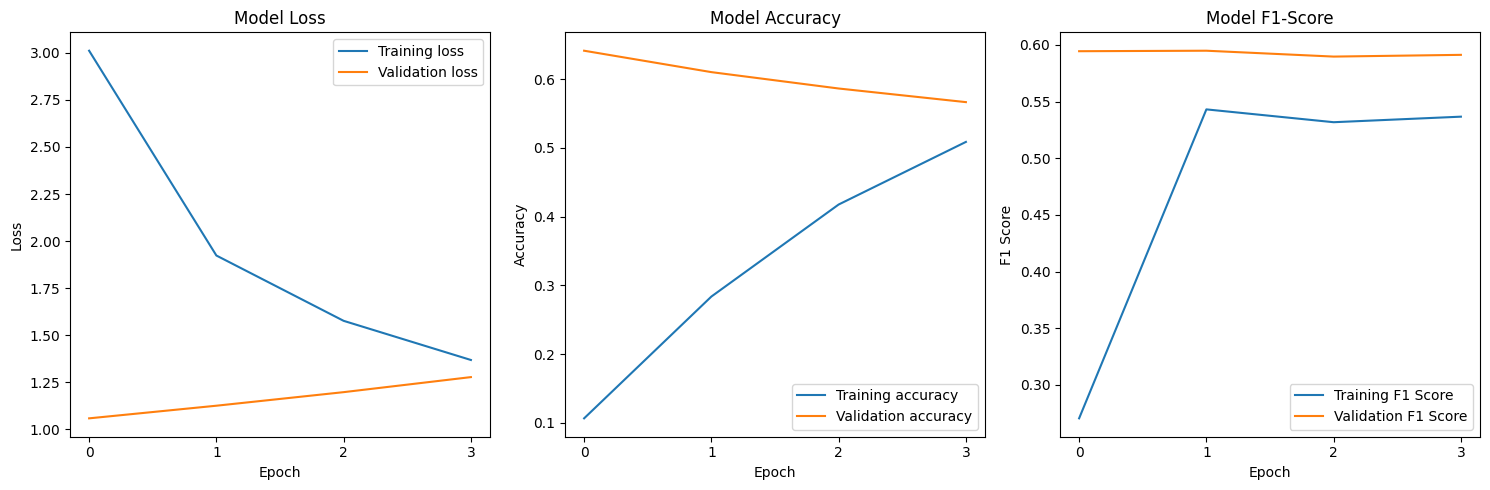

In [ ]:
mostrarEvolucion(hist_adadelta)

Vamos a destacar las diferencias entre los dos optimizadores probados: AdamW y Adadelta.

**AdamW** es una variante de Adam que incluye weight decay para evitar el overfitting. Esta regularización se añade a la actualización de los pesos, lo que ayuda a mantener los pesos pequeños y evitar que se concentren en una región específica del espacio de pesos.

Por otro lado, **Adadelta** ajusta el learning rate para cada parámetro según su historial de gradientes, lo que permite que los parámetros que cambian más rápidamente reciban ajustes más pequeños, y viceversa.

En cuanto a los resultados, con Adamw se obtienen mejores resultados (0.99 accuracy) frente a Adadelta (0.87), además, lo hace en muchas menos épocas (6 vs. 20), por lo que en este problema es más adecuado usar el optimizador Adamw

Nos quedamos finalmente con el optimizador Adam que proporciona muy buenos resultados EN EL CONJUNTO DE VALIDACIÓN en comparación con Adadelta que da peores.


Como hemos observado, el modelo final usando el optimizado Adam es relativamente sencillo y ha mostrado  resultados considerablemente buenos. Por esta razón, voy a  aplicar una estrategia similar con el conjunto de datos FASHION-MNIST, que es comparable al MNIST pero introduce una mayor complejidad debido a su variedad de artículos de moda en lugar de simples dígitos. Esta mayor complejidad representa un desafío interesante que podría revelar más sobre la capacidad de nuestro modelo para manejar datos más diversificados y visualmente complejos.

Además, este dataset será utilizado en ejercicios posteriores, concretamente se tratará de eliminar el ruido de las imágenes, lo que nos permitirá realizar comparaciones directas entre realizar el entrenamiento de este dataset utilizando las imágenes con cierto ruido o tras haberlas limpiado.

# FASHION-MNIST

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=e8f35f6adc201d925050fcf412ddfbb758878742e45fcc019985bc6ad77dd9fd
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Obtener los índices de las divisiones de test y val
train_index, val_index = next(sss.split(x_train, y_train))

test_data = x_train
test_pred = y_train

# Dividir el conjunto de datos en entrenamiento y test según los índices generados
x_train, x_val = test_data[train_index], test_data[val_index]
y_train, y_val = test_pred[train_index], test_pred[val_index]

In [7]:
len(x_train)

48000

In [8]:
len(x_val)

12000

In [9]:
len(x_test)

10000

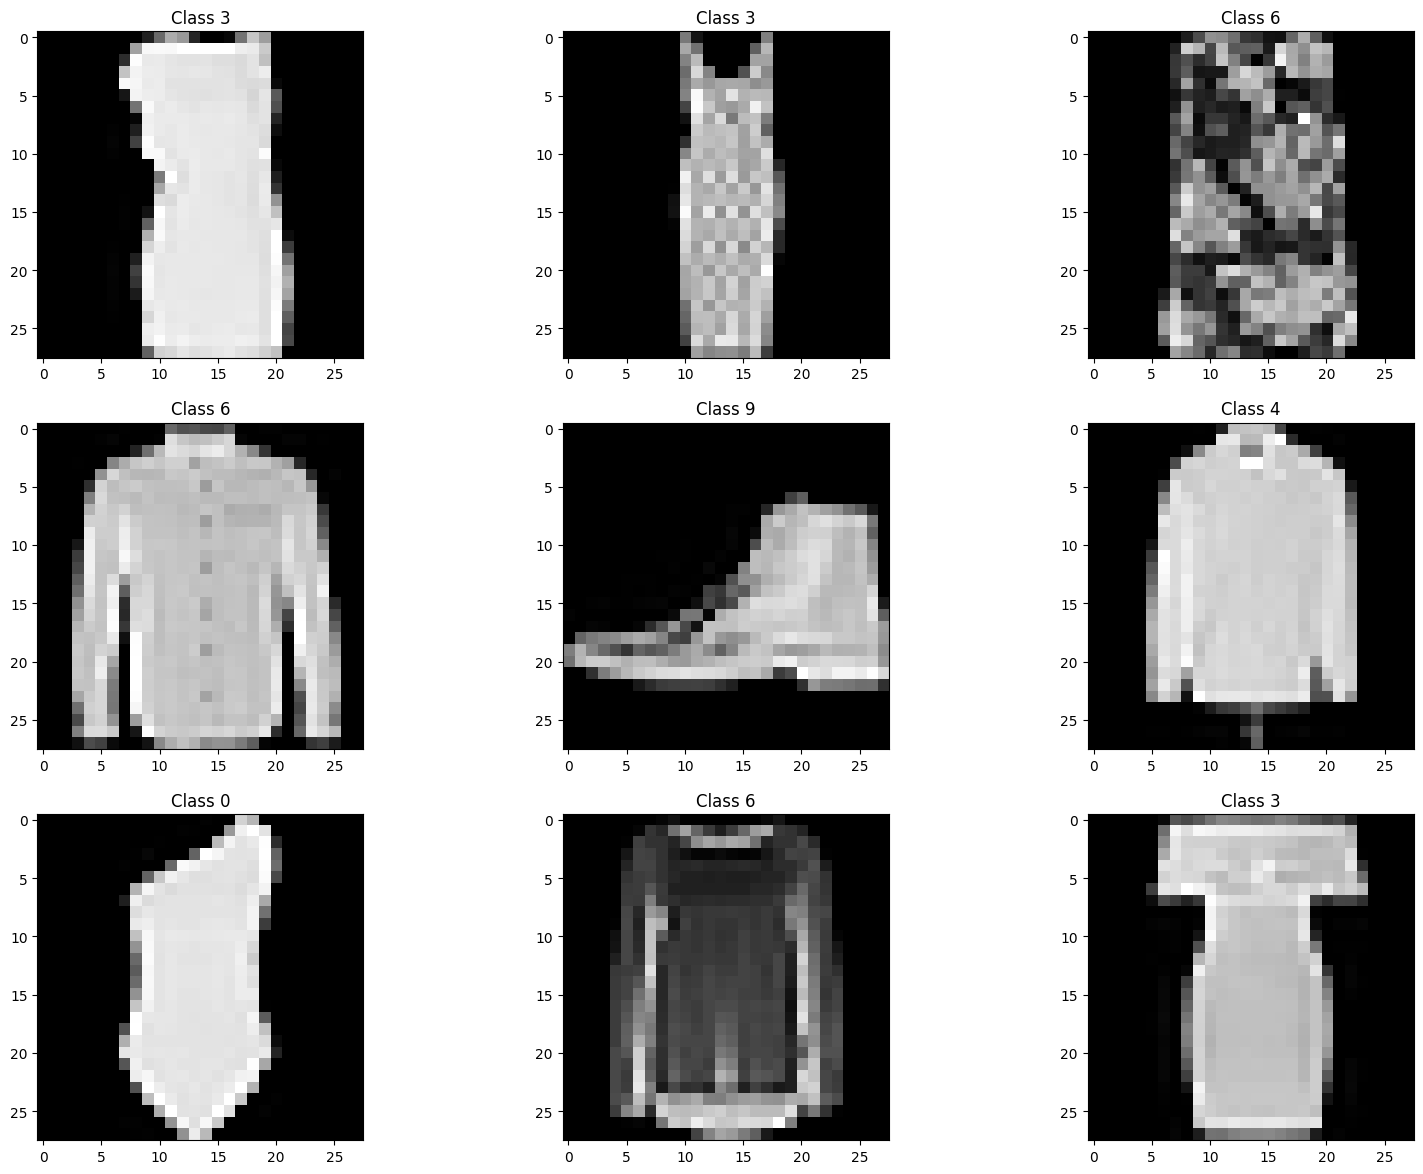

In [10]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

https://www.kaggle.com/code/jaeboklee/pytorch-fashion-mnist-lenet5-ensemble lr 0.0001

In [18]:
import time

#lr=5e-4
# Entrenamiento y evaluación con AdamW
model_adamw.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=AdamW(),
    metrics=['accuracy', f1_score_metric]
)
start_time = time.time()

hist_adamw = model_adamw.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1,
                             validation_data=(x_val,y_val), callbacks=[early_stopping])
training_time = time.time() - start_time
print(training_time)

Epoch 1/20
3000/3000 [==============================] - 21s 5ms/step - loss: 0.4848 - accuracy: 0.8222 - f1_score_metric: 0.7593 - val_loss: 0.3359 - val_accuracy: 0.8809 - val_f1_score_metric: 0.8100
Epoch 2/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.3172 - accuracy: 0.8842 - f1_score_metric: 0.7955 - val_loss: 0.3353 - val_accuracy: 0.8755 - val_f1_score_metric: 0.8094
Epoch 3/20
3000/3000 [==============================] - 18s 6ms/step - loss: 0.2787 - accuracy: 0.8981 - f1_score_metric: 0.8023 - val_loss: 0.2936 - val_accuracy: 0.8893 - val_f1_score_metric: 0.8135
Epoch 4/20
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2512 - accuracy: 0.9062 - f1_score_metric: 0.8014 - val_loss: 0.2661 - val_accuracy: 0.9031 - val_f1_score_metric: 0.8137
Epoch 5/20
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2300 - accuracy: 0.9129 - f1_score_metric: 0.7952 - val_loss: 0.2553 - val_accuracy: 0.9097 - val_f1_score_metric: 0.

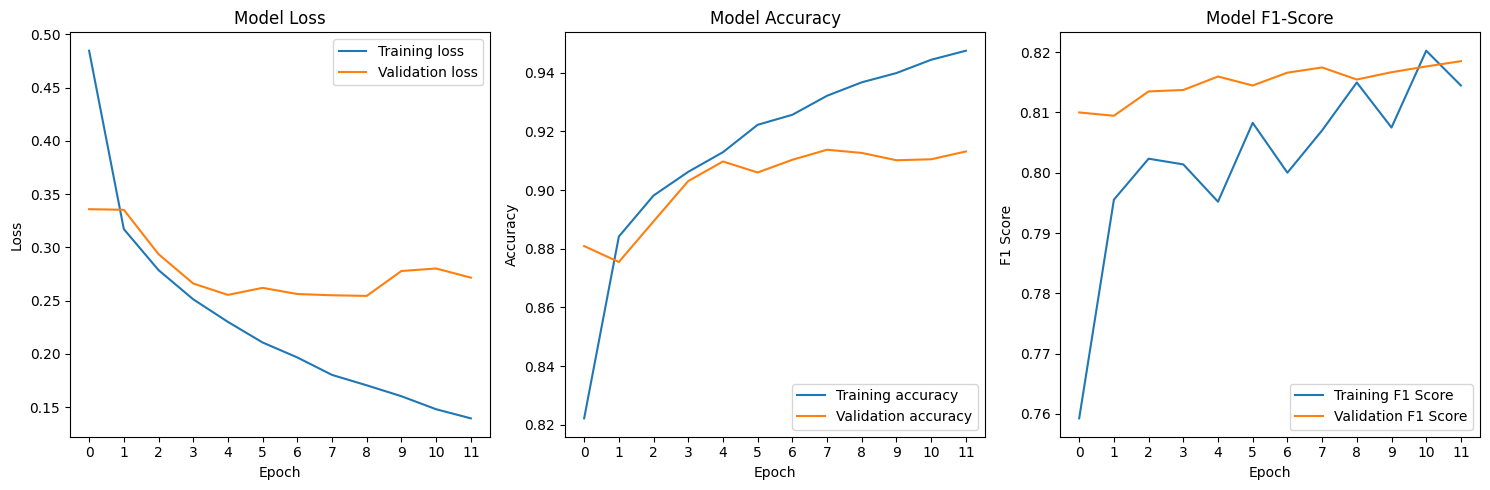

In [19]:
mostrarEvolucion(hist_adamw)

1500/1500 [==============================] - 3s 2ms/step


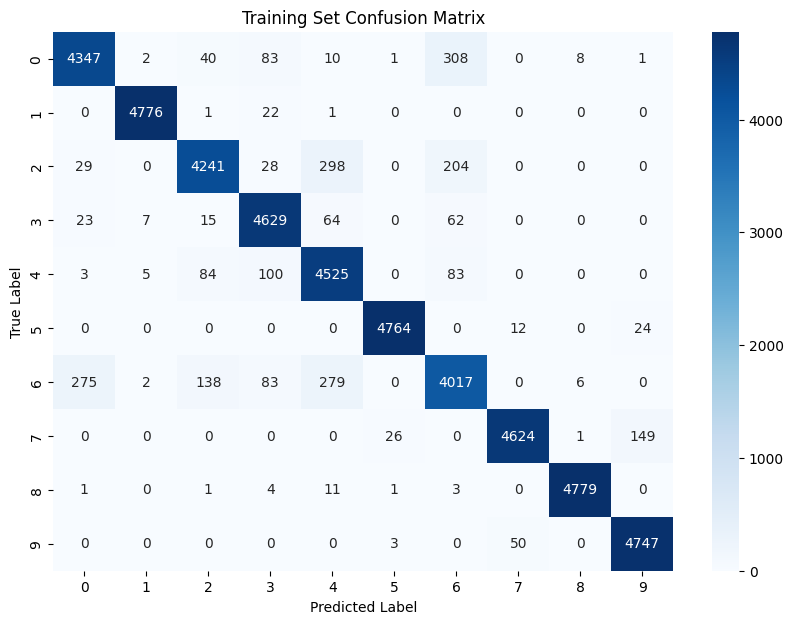

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Para visualizar la matriz de confusión

# Predicciones
y_pred_train = model_adamw.predict(x_train)

# Convertir probabilidades a clases predichas
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_true_train = np.argmax(y_train, axis=1)

# Matrices de Confusión
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train_classes)

# Función para visualizar la matriz de confusión

# Mostrar matrices de confusión
plot_confusion_matrix(conf_matrix_train, title='Training Set Confusion Matrix')


In [25]:
# Mapeo de las etiquetas numéricas a textuales para Fashion-MNIST
label_names = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'A.boot'
}

def plot_misclassified_images2(x_data, y_true, y_pred, title='Misclassified Images'):
    # Encuentra los índices donde las predicciones no coinciden con las etiquetas verdaderas
    misclassified_indexes = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 5))
    for i, mis_idx in enumerate(misclassified_indexes[:10]):  # Mostrar solo los primeros 10
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.squeeze(x_data[mis_idx]), cmap='gray')
        # Usar el diccionario de etiquetas para mostrar el texto en lugar de números
        pred_label = label_names[y_pred[mis_idx]]
        true_label = label_names[y_true[mis_idx]]
        plt.title(f'Pred: {pred_label}, True: {true_label}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

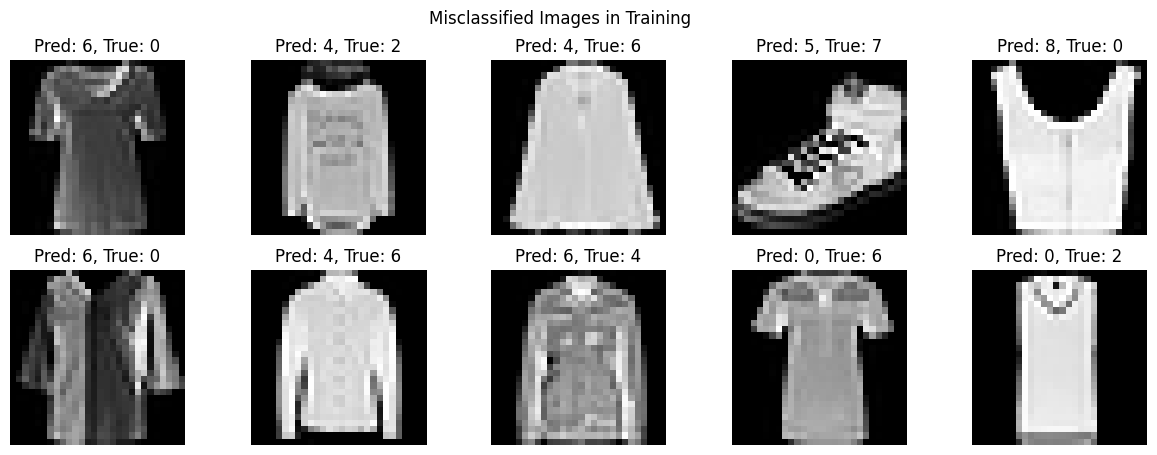

In [26]:

# Mostrar ejemplos mal clasificados en entrenamiento y prueba
plot_misclassified_images(x_train, y_true_train, y_pred_train_classes, 'Misclassified Images in Training')

In [27]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluar el modelo en el conjunto de test
score_adamw = model_adamw.evaluate(x_test, y_test, verbose=0)
print('AdamW pérdida en Test:', score_adamw[0])
print('AdamW Test accuracy:', score_adamw[1])
print('AdamW Test F1-Score:', score_adamw[2])

# Calcular el F1-Score en el test
y_pred_adamw = model_adamw.predict(x_test)
# Otra forma de calcular el accuracy en test
accuracy_adamw = calcularAccuracy(y_test, y_pred_adamw)
print('AdamW Accuracy:', accuracy_adamw)


AdamW pérdida en Test: 0.2639853060245514
AdamW Test accuracy: 0.9081000089645386
AdamW Test F1-Score: 0.9632141590118408
313/313 [==============================] - 1s 2ms/step
AdamW Accuracy: 0.9081


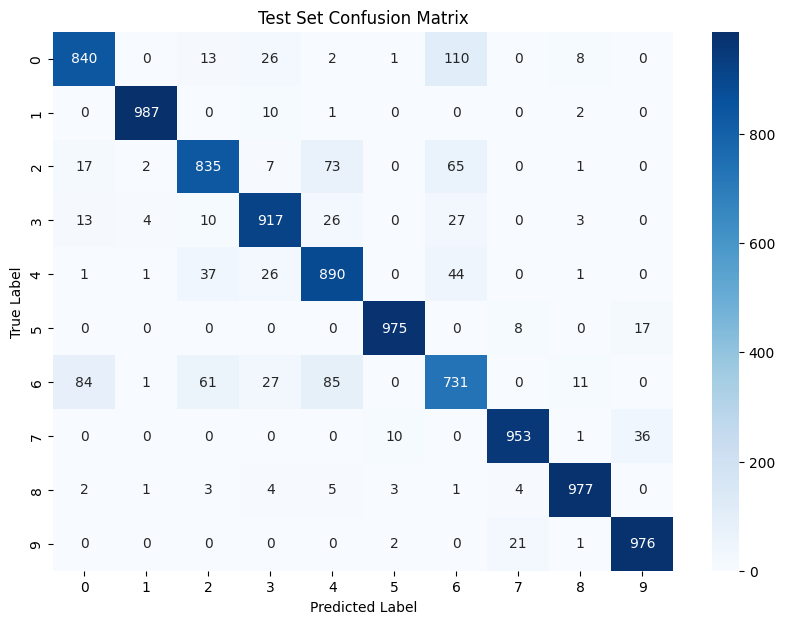

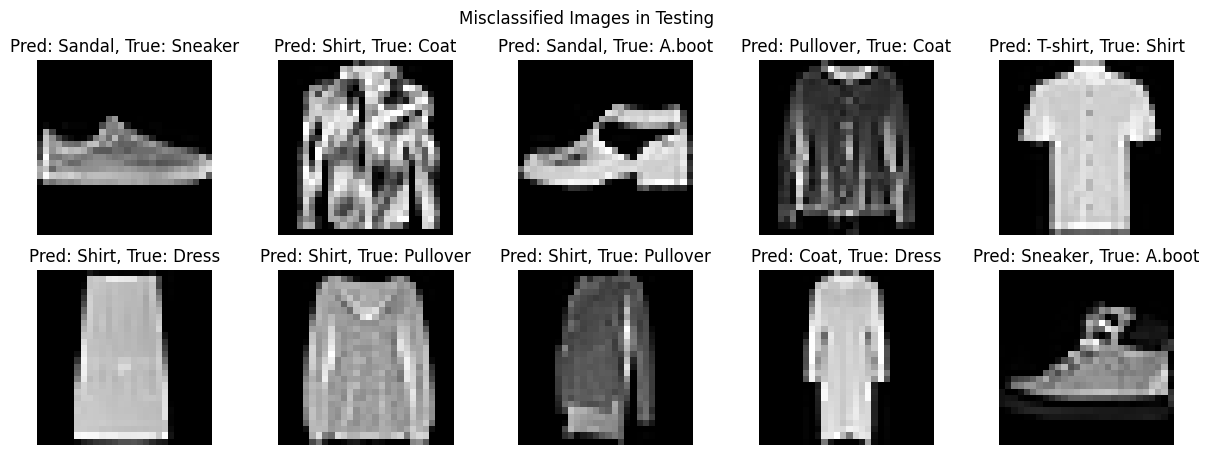

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Para visualizar la matriz de confusión

y_pred_test_classes = np.argmax(y_pred_adamw, axis=1)
y_true_test = np.argmax(y_test, axis=1)


conf_matrix_test = confusion_matrix(y_true_test, y_pred_test_classes)

# Mostrar matrices de confusión
plot_confusion_matrix(conf_matrix_test, title='Test Set Confusion Matrix')

plot_misclassified_images2(x_test, y_true_test, y_pred_test_classes, 'Misclassified Images in Testing')


0.9

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [ ]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(60000, 16)


In [ ]:
# A CUBRIR POR EL ALUMNADO
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
x_train_HOG = scaler.fit_transform(x_train_HOG)
x_test_HOG = scaler.transform(x_test_HOG)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from joblib import parallel_backend

# Definir el pipeline de SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(max_iter=5000, probability=True))
])

# Definir los parámetros para GridSearchCV
param_grid = {
    'svm__C': [1, 10, 100, 1000],
    'svm__kernel': ['linear', 'poly', 'rbf']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Utilizar el backend de subprocesos en lugar de procesos para evitar conflictos con JAX
with parallel_backend('threading'):
    grid_search.fit(x_train_HOG, np.argmax(y_train, axis=1))

# Mostrar los mejores parámetros y el mejor score obtenido
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor score de validación cruzada (accuracy): ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Definimos el modelo con los mejores parámetros encontrados

In [ ]:
# Definir y entrenar el clasificador SVM
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

sv = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(max_iter=5000, C=10, kernel='rbf', probability=True))
])

Debido a la gran cantidad de datos, y para entrenar en las mismas condiciones que la red neuronal del apartado anterior, decidimos utilizar hold-out como método de validación.

In [ ]:
# Entrenamos el modelo
sv.fit(x_train_HOG, np.argmax(y_train, axis=1))

# Predecimos sobre test
y_pred = sv.predict(x_test_HOG)

Calculamos las métricas para medir el rendimiento de este método.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
# Matriz de confusión
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
roc_auc = roc_auc_score(label_binarize(np.argmax(y_test, axis=1), classes=np.unique(np.argmax(y_test, axis=1))), sv.predict_proba(x_test_HOG), average='weighted', multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


In [ ]:
# Reporte de clasificación
cr = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Reporte de Clasificación:\n", cr)

Y observamos que a pesar de la búsqueda exhaustiva de los hiperparámetros, los resultados obtenidos son peores que con las redes neuronales del apartado anterior. La ventaja de este método es que en el entrenamiento ha invertido menos tiempo.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

In [ ]:
# A CUBRIR POR EL ALUMNADO


# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


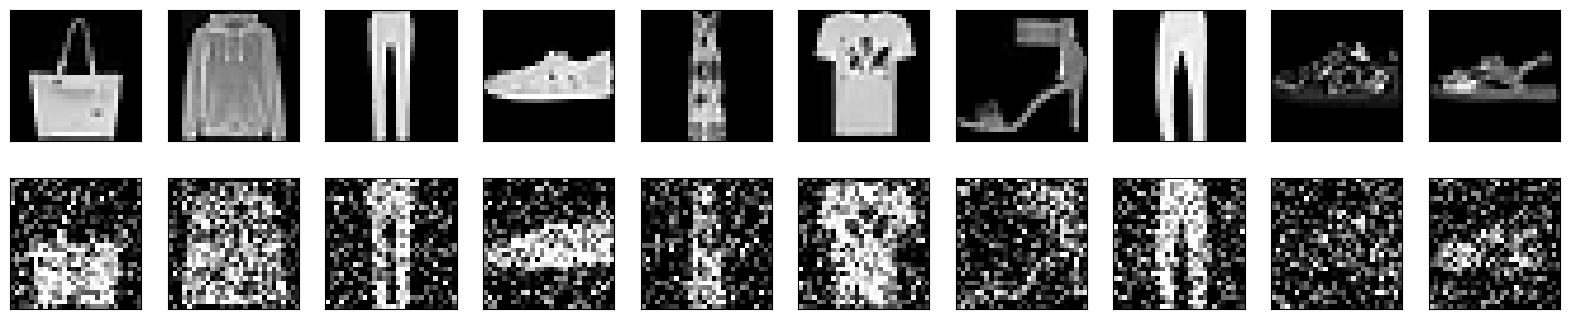

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

In [ ]:
# A CUBRIR POR EL ALUMNADO

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

In [ ]:

# A CUBRIR POR EL ALUMNADO


<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

In [ ]:
# A CUBRIR POR EL ALUMNADO


<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

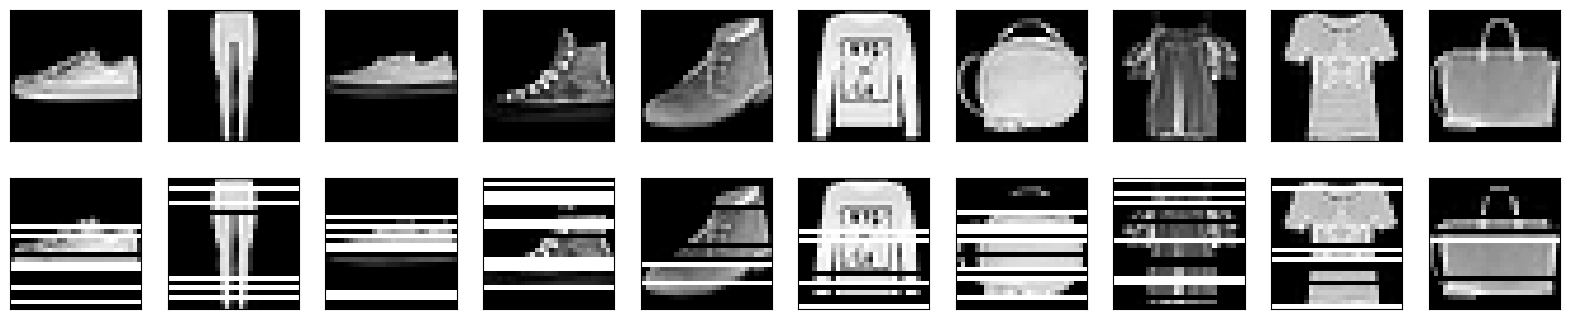

In [ ]:
noise_factor = 0.4

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

In [ ]:
# A CUBRIR POR EL ALUMNADO

y luego intentar aplicarle el quitar ruido a ver que tal sale